### Exploración tiempos espera

### Carga y Análisis General

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

In [67]:
df = pd.read_csv("../../data/ex1/eventos_espera_semana_nuevo")
df.columns

Index(['ICAO', 'ultimo_parado', 'despegue', 'tiempo_espera', 'aircraft_type',
       'lat', 'lon', 'fecha_despegue', 'hora_despegue', 'runway'],
      dtype='object')

In [68]:
df.shape

(4038, 10)

Inicialmente tenemos unos 4000 despegues.


In [69]:
icaos_con_varios_tipos = df[['ICAO', 'aircraft_type']].drop_duplicates().dropna()
icaos_con_varios_tipos = icaos_con_varios_tipos[icaos_con_varios_tipos['aircraft_type'] != 'No category information']
icaos_con_varios_tipos = icaos_con_varios_tipos.groupby('ICAO').agg({'aircraft_type': 'count'})
icaos_con_varios_tipos = icaos_con_varios_tipos[icaos_con_varios_tipos['aircraft_type'] > 1]
icaos_con_varios_tipos.sort_values(by='ICAO', ascending=False)

,aircraft_type
ICAO,
E94C8E,2
E072D0,2
E06588,2
AB84AB,2
AAF828,2
...,...
3415CF,2
3415CE,2
34134E,2


In [70]:
icaos_con_varios_tipos = df[['ICAO', 'aircraft_type', 'tiempo_espera']].drop_duplicates().dropna()
icaos_con_varios_tipos = icaos_con_varios_tipos[icaos_con_varios_tipos['aircraft_type'] != 'No category information']

icaos_con_varios_tipos.pivot_table('tiempo_espera', 'ICAO', 'aircraft_type', aggfunc='count')

aircraft_type,Heavy (larger than 136000 kg),High vortex aircraft,Rotorcraft
ICAO,,,
000001,NaN,4.0,1.0
0100DB,NaN,2.0,NaN
0101BA,1.0,NaN,NaN
0101BE,NaN,1.0,NaN
010236,NaN,2.0,NaN
...,...,...,...
E8046F,NaN,1.0,NaN
E80473,NaN,1.0,NaN
E80475,NaN,2.0,NaN


Vemos que algunos aviones parecen haber emitido mensajes en los que sus tipos son distintos lo cual no tiene sentido.


In [71]:
df['tiempo_espera'].describe()

count      4038.000000
mean       1759.392035
std       20034.703016
min           0.000000
25%          24.308000
50%          36.978500
75%         477.867750
max      518771.655000
Name: tiempo_espera, dtype: float64

**El máximo** es bastante sospechoso, tendremos que ver que ha pasado

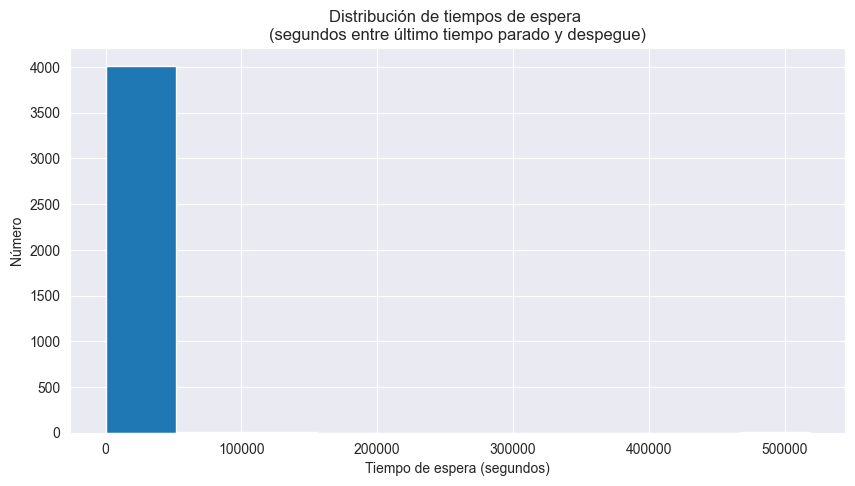

In [72]:
fig, ax = plt.subplots(1,1,figsize=(10, 5))
ax.set_title('Distribución de tiempos de espera \n(segundos entre último tiempo parado y despegue)')
ax.set_xlabel('Tiempo de espera (segundos)')
ax.set_ylabel('Número')
df.tiempo_espera.hist(ax=ax);

In [73]:
df = df[df["tiempo_espera"] < 10000]

Eliminamos los aviones con tiempos de espera mayor a 166 minutos por considerarlos outliers y para poder ver mejor que pasa.

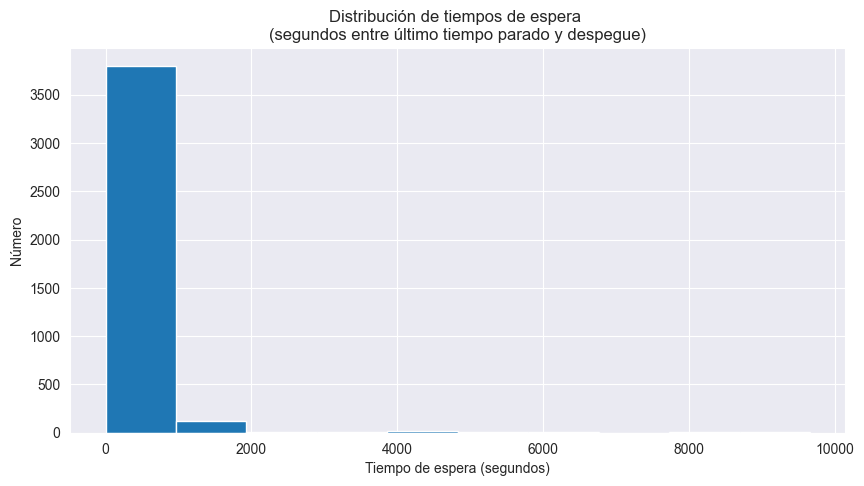

In [74]:
fig, ax = plt.subplots(1,1,figsize=(10, 5))
ax.set_title('Distribución de tiempos de espera \n(segundos entre último tiempo parado y despegue)')
ax.set_xlabel('Tiempo de espera (segundos)')
ax.set_ylabel('Número')
df.tiempo_espera.hist(ax=ax);

Aun vemos que hay outliers. Decidimos fijar 1500 segundos como un valor razonable. 25 minutos de tiempo de espera máximo.

In [76]:
df = df[df["tiempo_espera"] < 1500]

In [77]:
df.shape

(3916, 10)

In [78]:
df.head()

,ICAO,ultimo_parado,despegue,tiempo_espera,aircraft_type,lat,lon,fecha_despegue,hora_despegue,runway
0,3C5434,2024-12-03 08:17:54.070,2024-12-03 08:28:40.767,646.697,High vortex aircraft,40.496109,-3.574646,2024-12-03,8,18R/36L
1,3C5434,2024-12-03 21:14:30.880,2024-12-03 21:14:49.599,18.719,High vortex aircraft,40.504939,-3.559227,2024-12-03,21,18L/36R
2,44046D,2024-12-01 19:13:45.545,2024-12-01 19:31:45.660,1080.115,High vortex aircraft,40.505637,-3.559243,2024-12-01,19,18L/36R
3,4952CE,2024-12-01 06:55:32.575,2024-12-01 06:55:53.525,20.950,High vortex aircraft,40.496990,-3.574631,2024-12-01,6,18R/36L
4,E8043B,2024-12-02 23:45:55.121,2024-12-02 23:46:35.072,39.951,High vortex aircraft,40.497803,-3.574615,2024-12-02,23,18R/36L


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3916 entries, 0 to 4036
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ICAO            3916 non-null   object 
 1   ultimo_parado   3916 non-null   object 
 2   despegue        3916 non-null   object 
 3   tiempo_espera   3916 non-null   float64
 4   aircraft_type   3916 non-null   object 
 5   lat             3916 non-null   float64
 6   lon             3916 non-null   float64
 7   fecha_despegue  3916 non-null   object 
 8   hora_despegue   3916 non-null   int64  
 9   runway          3730 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 336.5+ KB


Convertimos las columnas al tipo fecha

In [80]:
df['ultimo_parado'] = pd.to_datetime(df['ultimo_parado'])
df['despegue'] = pd.to_datetime(df['despegue'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3916 entries, 0 to 4036
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ICAO            3916 non-null   object        
 1   ultimo_parado   3916 non-null   datetime64[ns]
 2   despegue        3916 non-null   datetime64[ns]
 3   tiempo_espera   3916 non-null   float64       
 4   aircraft_type   3916 non-null   object        
 5   lat             3916 non-null   float64       
 6   lon             3916 non-null   float64       
 7   fecha_despegue  3916 non-null   object        
 8   hora_despegue   3916 non-null   int64         
 9   runway          3730 non-null   object        
dtypes: datetime64[ns](2), float64(3), int64(1), object(4)
memory usage: 336.5+ KB


In [81]:
df['tiempo_espera'].describe()

count    3916.000000
mean      224.773456
std       302.777599
min         0.000000
25%        24.164750
50%        35.394000
75%       435.396500
max      1424.513000
Name: tiempo_espera, dtype: float64

El describe ahora tiene mucho mas sentido, siendo la mediana 35 segundos (algo razonable por ejemplo si el avión para en la pista justo antes del despegue y tarda aproximadamente ese tiempo en acelerar y despegar) El máximo tambien puede ser real ya que puede darse una situación que por mucho tráfico o algun problema el avión espere 24 minutos. Creemos que los datos son bastante realistas.

#### Despegues por horas

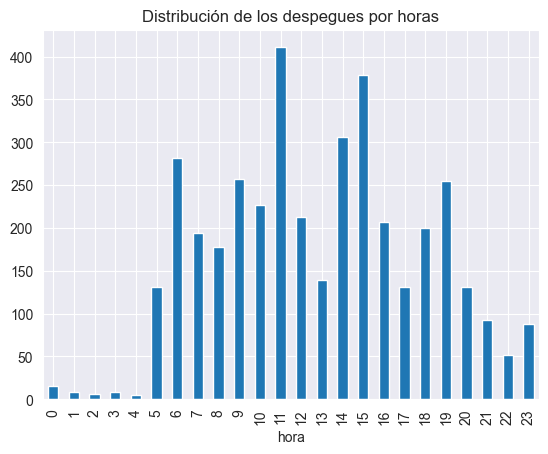

In [82]:
df.hora_despegue.value_counts().sort_index().plot(kind="bar")
plt.title('Distribución de los despegues por horas')
plt.xlabel('hora');

Vemos varias cosas:
- Hay muy pocos datos entre **las 0 y las 4 de la mañana**
- El mayor número de despegues ocurre a las 11 de la mañana

In [83]:
df.despegue.dt.day_of_week.value_counts()

despegue
4    672
0    578
3    563
2    548
1    526
5    523
6    506
Name: count, dtype: int64

#### Despegues por días de la semana

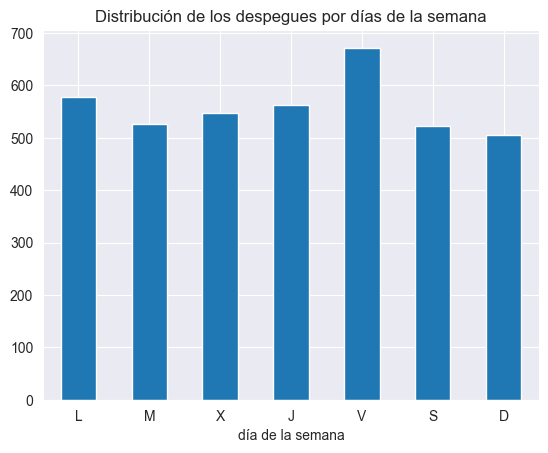

In [84]:
dias_semana = df.despegue.dt.day_of_week.value_counts().sort_index()
dias_semana.index = dias_semana.index.map(lambda x: ['L', 'M', 'X', 'J', 'V', 'S', 'D'][x])
dias_semana.plot(kind="bar")
plt.title('Distribución de los despegues por días de la semana')
plt.xticks(rotation=0)
plt.xlabel('día de la semana');

En este caso las distribución de vuelos parece ser uniforme para los días de las semana, esto es un punto a favor para la consistencias los datos extraídos

### Histograma

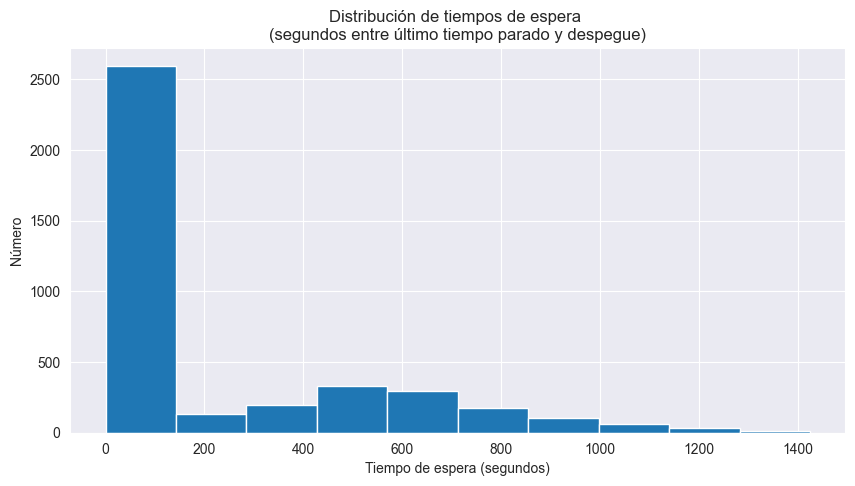

In [85]:
fig, ax = plt.subplots(1,1,figsize=(10, 5))
ax.set_title('Distribución de tiempos de espera \n(segundos entre último tiempo parado y despegue)')
ax.set_xlabel('Tiempo de espera (segundos)')
ax.set_ylabel('Número')
df.tiempo_espera.hist(ax=ax);

Vemos que la mayoria de aviones tienen un tiempo de espera menor de 200 segundos, lo cual es lo esperado si no surje ningun problema.

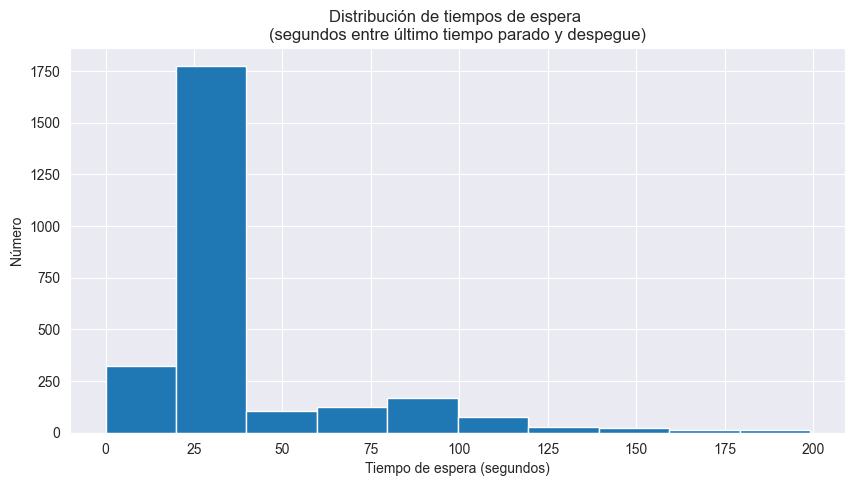

In [86]:
fig, ax = plt.subplots(1,1,figsize=(10, 5))
ax.set_title('Distribución de tiempos de espera \n(segundos entre último tiempo parado y despegue)')
ax.set_xlabel('Tiempo de espera (segundos)')
ax.set_ylabel('Número')
df2 = df[df["tiempo_espera"] < 200]
df2.tiempo_espera.hist(ax=ax);

Mas concretamente entre los menores de 200 segundos, la mayoria esperan alrededor de 30 segundos, lo que coincide precisamente con la mediana.

Ahora abordamos otro problema:

In [88]:
df['ICAO'].value_counts()

ICAO
345385    99
343650    30
345597    26
34604C    25
34750A    24
          ..
020111     1
06A30C     1
49328D     1
3442C9     1
AA4195     1
Name: count, Length: 1114, dtype: int64

Para un mismo ICAO tenemos un avión con 99 despegues. Otro con 30, aunque 30 es algo posible considerando unos 4 vuelos diarios durante la semana.

In [89]:
df_345385 = df[df['ICAO'] == "345385"]
df_345385.head(100)

,ICAO,ultimo_parado,despegue,tiempo_espera,aircraft_type,lat,lon,fecha_despegue,hora_despegue,runway
2525,345385,2024-12-06 07:17:56.355,2024-12-06 07:23:22.623,326.268,High vortex aircraft,40.498818,-3.574645,2024-12-06,7,18R/36L
2526,345385,2024-12-06 10:58:06.479,2024-12-06 10:58:07.202,0.723,Rotorcraft,40.496967,-3.591339,2024-12-06,10,NaN
2527,345385,2024-12-06 10:58:11.673,2024-12-06 10:58:12.163,0.490,High vortex aircraft,40.496967,-3.591339,2024-12-06,10,NaN
2528,345385,2024-12-06 10:58:13.325,2024-12-06 10:58:13.809,0.484,High vortex aircraft,40.496967,-3.591343,2024-12-06,10,NaN
2529,345385,2024-12-06 10:58:13.809,2024-12-06 10:58:13.809,0.000,High vortex aircraft,40.496967,-3.591343,2024-12-06,10,NaN
...,...,...,...,...,...,...,...,...,...,...
2619,345385,2024-12-06 11:09:03.436,2024-12-06 11:09:04.216,0.780,High vortex aircraft,40.497479,-3.591687,2024-12-06,11,NaN
2620,345385,2024-12-06 11:09:07.035,2024-12-06 11:09:09.061,2.026,High vortex aircraft,40.497479,-3.591687,2024-12-06,11,NaN
2621,345385,2024-12-06 11:19:06.835,2024-12-06 11:19:32.588,25.753,High vortex aircraft,40.498981,-3.574646,2024-12-06,11,18R/36L
2622,345385,2024-12-06 15:13:33.898,2024-12-06 15:17:43.505,249.607,High vortex aircraft,40.493313,-3.574630,2024-12-06,15,18R/36L


Si nos fijamos en la columna "despegue" vemos como hay despegues consecutivos, cada varios segundos incluso cada segundo. Esto evidentemente no es posible. Casualmente los despegues consecutivos no tienen columna "runway" lo que significa que no se encontraban en la pista en el momento en el que supuestamente "despegaron", es decir, son despegues falsos.

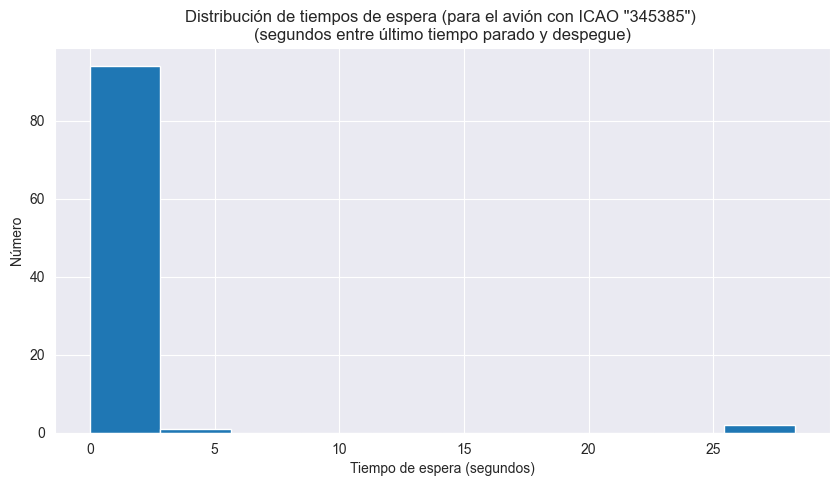

In [91]:
fig, ax = plt.subplots(1,1,figsize=(10, 5))
ax.set_title('Distribución de tiempos de espera (para el avión con ICAO "345385") \n(segundos entre último tiempo parado y despegue)')
ax.set_xlabel('Tiempo de espera (segundos)')
ax.set_ylabel('Número')
df_345385[df_345385.tiempo_espera < 50].tiempo_espera.hist(ax=ax);

Más de 80 despegues tienen un tiempo de espera de menos de 5 segundos y suceden de manera consecutiva, lo cual no tiene sentido.

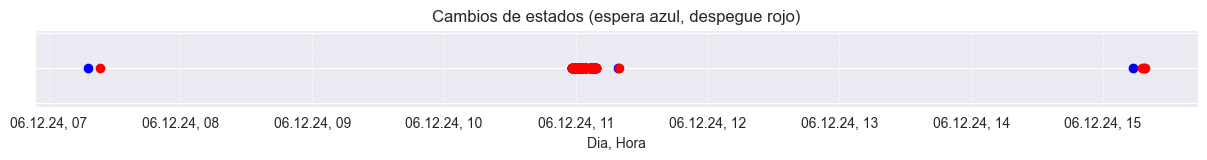

In [92]:
import matplotlib.dates as mdates

fig, axs = plt.subplots(1,1, figsize=(15, 1))

axs.scatter(df_345385.ultimo_parado, [1] * df_345385.shape[0], marker="o", color="blue")
axs.scatter(df_345385.despegue, [1] * df_345385.shape[0], marker="o", color="red")

axs.set_title("Cambios de estados (espera azul, despegue rojo)")
axs.grid(axis='x', linestyle='--', alpha=0.6)

axs.set_yticklabels([])
axs.set_xlabel("Dia, Hora")
myFmt = mdates.DateFormatter('%d.%m.%y, %H')
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
axs.xaxis.set_major_formatter(myFmt);

En el plot anterior vemos como si parece haber un par de despegues reales (al principio y al final) pero en el medio parece que se registran todos esos despegues falsos.

Decidimos eliminar los despegues cuya "runway" es NA.

In [94]:
df = df.dropna(subset = ['runway'])

In [96]:
df['ICAO'].value_counts()

ICAO
34750A    24
345597    24
34604C    23
347307    23
345698    22
          ..
020111     1
06A30C     1
4692CC     1
3964EF     1
AA4195     1
Name: count, Length: 1107, dtype: int64

Con este filtro, el avion de 99 despegues desaparece de entre los aviones con mas despegues, y el orden en general cambia un poco. Ahora si parece realista que el avion con mas despegues tenga 24, siendo unos 3 vuelos diarios.

In [97]:
df.shape

(3730, 10)

Nos quedamos con 3700 despegues aproximadamente

Ahora identificamos otro problema. En el siguiente df podemos ver como el despegue de la fila 8 y fila 9 suceden de manera consecutiva. El resto de despegues parece que se comportan correctamente por lo que pensamos que puede haber unos pocos casos en los que registramos 2 despegues cuando es 1 unico despegue. Comprobamos con "https://globe.adsbexchange.com" y con varios casos que el despegue en realidad es la 2 entrada de la tabla. Por tanto realizamos un pequeño preprocesado para eliminar estos pocos casos

In [100]:
df_345597 = df[df['ICAO'] == "345597"]
df_345597.head(100)

,ICAO,ultimo_parado,despegue,tiempo_espera,aircraft_type,lat,lon,fecha_despegue,hora_despegue,runway
1577,345597,2024-12-01 08:21:48.151,2024-12-01 08:22:13.516,25.365,Heavy (larger than 136000 kg),40.505905,-3.559227,2024-12-01,8,18L/36R
1578,345597,2024-12-01 15:24:22.629,2024-12-01 15:24:44.939,22.310,High vortex aircraft,40.505871,-3.559219,2024-12-01,15,18L/36R
1579,345597,2024-12-01 18:45:21.616,2024-12-01 18:55:49.436,627.820,High vortex aircraft,40.506301,-3.559227,2024-12-01,18,18L/36R
1581,345597,2024-12-02 06:27:13.706,2024-12-02 06:27:15.541,1.835,High vortex aircraft,40.500389,-3.559180,2024-12-02,6,18L/36R
1582,345597,2024-12-02 06:27:40.398,2024-12-02 06:28:04.728,24.330,High vortex aircraft,40.505962,-3.559235,2024-12-02,6,18L/36R
1583,345597,2024-12-02 10:35:25.079,2024-12-02 10:36:00.032,34.953,High vortex aircraft,40.480290,-3.571321,2024-12-02,10,14R/32L
1584,345597,2024-12-02 14:52:32.074,2024-12-02 14:56:39.873,247.799,High vortex aircraft,40.505579,-3.559211,2024-12-02,14,18L/36R
1585,345597,2024-12-02 19:41:18.695,2024-12-02 19:41:36.584,17.889,High vortex aircraft,40.500005,-3.559461,2024-12-02,19,18L/36R
1586,345597,2024-12-02 19:42:25.361,2024-12-02 19:42:47.632,22.271,High vortex aircraft,40.505591,-3.559227,2024-12-02,19,18L/36R
1587,345597,2024-12-03 07:45:43.587,2024-12-03 07:46:22.929,39.342,High vortex aircraft,40.498936,-3.574646,2024-12-03,7,18R/36L


Ahora eliminamos despegues

In [101]:
import pandas as pd

# Suponiendo que 'df' es tu DataFrame y que 'despegue' es de tipo datetime

indices_a_eliminar = []
last_index = None
lastIcao = None
lastDespegue = None

# Iteramos sobre el DataFrame usando iterrows() para obtener el índice de cada fila
for idx, row in df.iterrows():
    if (lastIcao == row['ICAO']) and ((row['despegue'] - lastDespegue) < pd.Timedelta(minutes=5)):
        # Marcamos la fila anterior para eliminarla
        indices_a_eliminar.append(last_index)

    # Actualizamos las variables para la siguiente iteración
    lastIcao = row['ICAO']
    lastDespegue = row['despegue']
    last_index = idx

# Eliminamos todas las filas marcadas de una sola vez
df = df.drop(indices_a_eliminar)



In [102]:
df.shape

(3719, 10)

Solo hemos eliminado 11 despegues, lo que confirma nuestra hipotesis de que eran casos aislados.

### Boxplot

Cogemos los 10 aviones con mas filas sobre tiempos de espera

In [103]:
top_10_most_frequent = df.ICAO.value_counts()[:10]
top_10_most_frequent

ICAO
34750A    24
347307    23
34750F    22
345698    21
345597    21
34604B    21
34324E    21
3453CC    21
34604C    21
343650    21
Name: count, dtype: int64

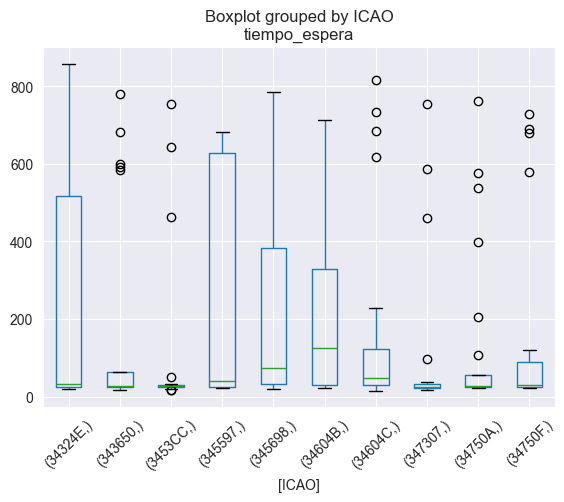

In [104]:
df[df.ICAO.isin(top_10_most_frequent.index)].boxplot(column=['tiempo_espera'], by=['ICAO'])
plt.xticks(rotation=45);

No es casi nada informativo por los outliers, vamos a realizar una selección de los datos, como hacíamos en los histogramas

**Decartamos filas con tiempo inferior a 1 minuto y superiores a 30 minutos**

Cogemos los 10 aviones con mas filas sobre tiempos de espera

In [105]:
df_from_1_min = df[(df.tiempo_espera > 60) & (df.tiempo_espera < 1800)]
top_10_most_frequent = df_from_1_min.ICAO.value_counts()[:10]
top_10_most_frequent

ICAO
34604B    13
344417    12
344446    12
34134E    12
34660B    12
345698    11
344217    11
341682    11
345583    11
34538E    11
Name: count, dtype: int64

En este caso lo bueno es que tienen un número similar de filas

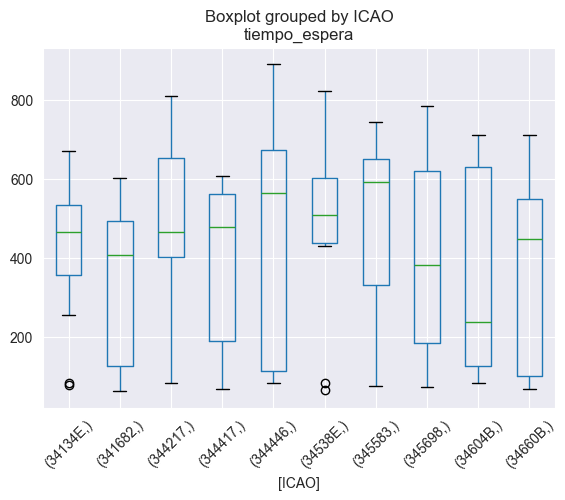

In [106]:
df_from_1_min[df_from_1_min.ICAO.isin(top_10_most_frequent.index)].boxplot(column=['tiempo_espera'], by=['ICAO'])
plt.xticks(rotation=45);

En este caso se pueden sacar algunos resultados.

Las medianas de los tiempos son muy diferentes, en un caso siendo 3 minutos (200 segundos) y en otros alrededor de 7 minutos (450 segundos)

In [107]:
import seaborn as sns

In [108]:
df['tiempo_espera'].describe()

count    3719.000000
mean      232.924080
std       306.058086
min         9.134000
25%        24.621000
50%        36.701000
75%       453.716000
max      1424.513000
Name: tiempo_espera, dtype: float64

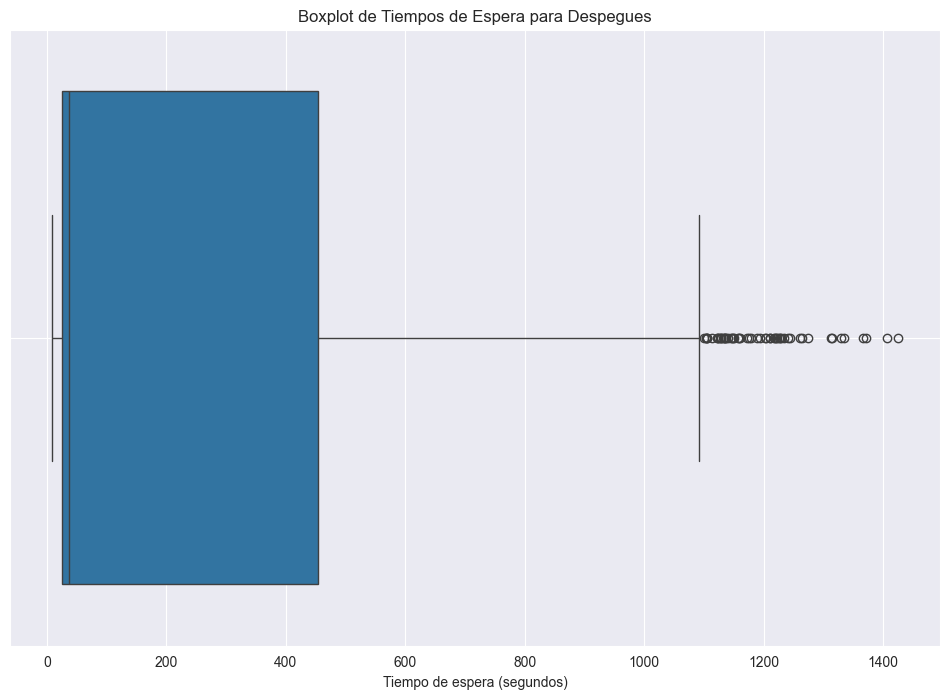

In [109]:
plt.figure(figsize=(12, 8))  # Tamaño de la figura
sns.boxplot(x=df['tiempo_espera'])
plt.title('Boxplot de Tiempos de Espera para Despegues')  # Título del gráfico
plt.xlabel('Tiempo de espera (segundos)')  # Etiqueta del eje X
plt.grid(True)  # Añadir una cuadrícula para mejor visualización
plt.show()

In [111]:
df['ultimo_parado'] = pd.to_datetime(df['ultimo_parado'])
df['despegue'] = pd.to_datetime(df['despegue'])
df['fecha_despegue'] = pd.to_datetime(df['fecha_despegue'])

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3719 entries, 0 to 4036
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ICAO            3719 non-null   object        
 1   ultimo_parado   3719 non-null   datetime64[ns]
 2   despegue        3719 non-null   datetime64[ns]
 3   tiempo_espera   3719 non-null   float64       
 4   aircraft_type   3719 non-null   object        
 5   lat             3719 non-null   float64       
 6   lon             3719 non-null   float64       
 7   fecha_despegue  3719 non-null   datetime64[ns]
 8   hora_despegue   3719 non-null   int64         
 9   runway          3719 non-null   object        
dtypes: datetime64[ns](3), float64(3), int64(1), object(3)
memory usage: 319.6+ KB


In [113]:
df['hora_despegue'] = df['hora_despegue'].astype(int)

In [114]:
print(df['aircraft_type'].unique())

['High vortex aircraft' 'Heavy (larger than 136000 kg)' 'Rotorcraft']


In [115]:
print(df.groupby('aircraft_type')['tiempo_espera'].max())

aircraft_type
Heavy (larger than 136000 kg)    1144.955
High vortex aircraft             1424.513
Rotorcraft                       1210.281
Name: tiempo_espera, dtype: float64


## Tipos de Aeronaves

### High vortex aircraft
- **Descripción**: Aeronaves que generan vórtices de estela significativos debido a su gran envergadura y superficie alar.
- **Ejemplos**:
  - **Boeing 777**: Utilizado para vuelos comerciales de larga distancia.
  - **Airbus A350**: Utilizado en rutas intercontinentales.

### Heavy (larger than 136000 kg)
- **Descripción**: Aviones con un peso de despegue superior a 136,000 kg, generalmente grandes aviones de pasajeros de cuerpo ancho o aviones de carga.
- **Ejemplos**:
  - **Boeing 747**: Utilizado tanto para pasajeros como para carga, conocido por su tamaño y capacidad.
  - **Airbus A380**: El avión de pasajeros más grande del mundo, usado en rutas internacionales.

### Rotorcraft
- **Descripción**: Aeronaves que utilizan rotores para generar sustentación, como helicópteros y girocópteros.
- **Ejemplos**:
  - **Sikorsky UH-60 Black Hawk**: Helicóptero militar multifunción.
  - **Eurocopter EC135**: Helicóptero ligero utilizado en servicios médicos de emergencia y transporte corporativo.


In [116]:
print(df["aircraft_type"].value_counts())

aircraft_type
High vortex aircraft             3342
Heavy (larger than 136000 kg)     346
Rotorcraft                         31
Name: count, dtype: int64


## Boxplot por tipo de avión

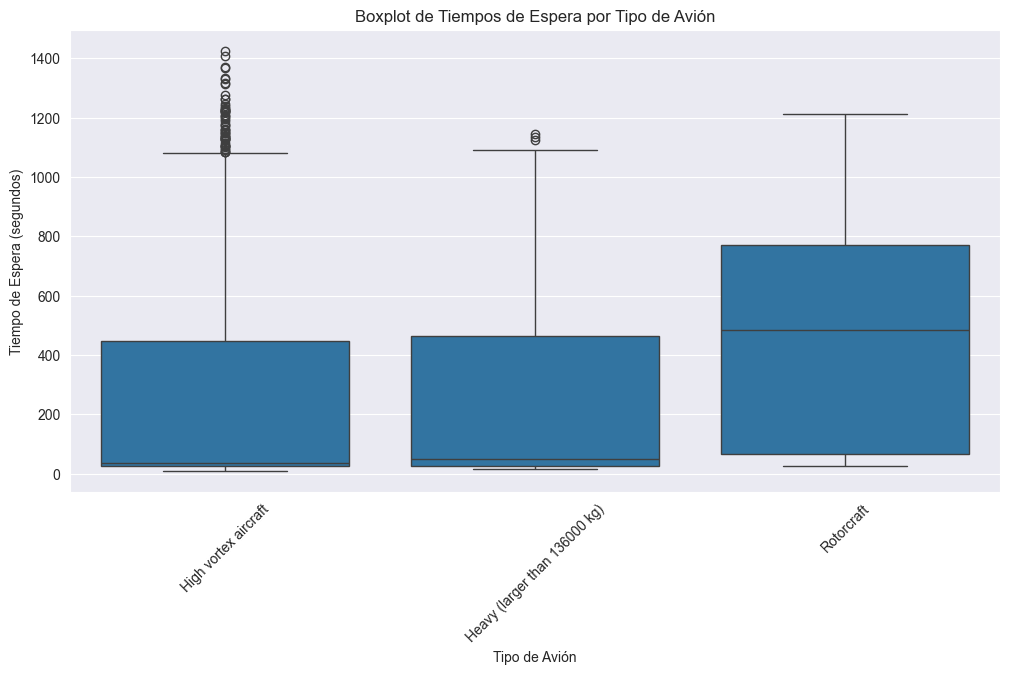

In [117]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='aircraft_type', y='tiempo_espera', data=df)
plt.title('Boxplot de Tiempos de Espera por Tipo de Avión')
plt.xlabel('Tipo de Avión')
plt.ylabel('Tiempo de Espera (segundos)')
plt.xticks(rotation=45)
plt.show()

Podemos ver que los aviones de pasajeros son mucho más comunes que otras vehículos como los  helicopteros. Además podemos apreciar que estas aeronaves que usan rotores no simpre son muy prioritarios, por lo que tienen más retrasos y más largos que los vuelos normales. Por otro lado, apreciamos que los aviones 'High Vortex Aircraft' son los más comunes por mucho. Esto puede deberse a que estos son tanto aviones de pasajeros que hacen vuelos más largos como aviones de carga. Además esto explicaría que en esta categoría tengamos vuelos con tantos tiempos de espera comparados con los 'Heavy' que representarían los vuelos más cortos y de pasajeros, ya que los vuelos de suelen tener menos prioridad y tiene tiempos de espera más largos. Además al ser vuelos que generan un gran vórtice de estela debido a su tamaño son más dificiles de coordinar que el resto. Por último resulta ver que tanto en High Vortex como en Rotorcraft tenemos varios casos con tiempos de espera de 500000, es decir, casi un año. Lo que resulta bastante raro y parece ser un error en los datos

## Mapa  de calor (días/horas)

/var/folders/yj/b67nj6ns6354tz4fxwtg4stw0000gn/T/ipykernel_1750/4586856.py:6: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df.pivot_table(index='dia_semana', columns='hora_despegue', values='tiempo_espera', aggfunc='count', fill_value=0)


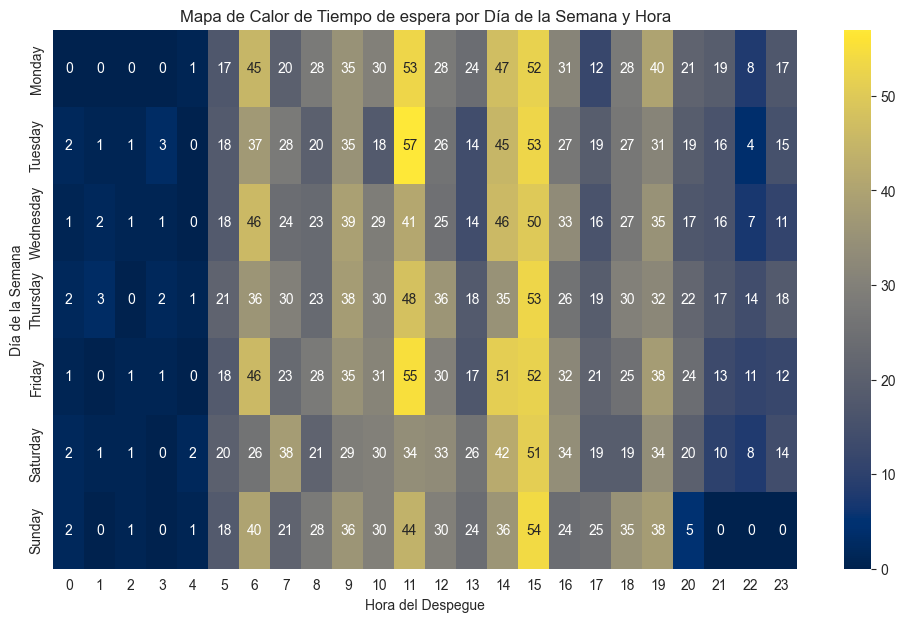

In [118]:
# Agregar columna de día de la semana
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df['dia_semana'] = pd.Categorical(df['fecha_despegue'].dt.day_name(), categories=day_order, ordered=True)

# Crear tabla pivot
pivot_table = df.pivot_table(index='dia_semana', columns='hora_despegue', values='tiempo_espera', aggfunc='count', fill_value=0)

# Mapa de calor de despegues por día de la semana y hora
plt.figure(figsize=(12, 7))
sns.heatmap(pivot_table, annot=True, fmt="d", cmap="cividis")
plt.title('Mapa de Calor de Tiempo de espera por Día de la Semana y Hora')
plt.xlabel('Hora del Despegue')
plt.ylabel('Día de la Semana')
plt.show()


## Mapa de calor (tipo de avión, días, horas)

/var/folders/yj/b67nj6ns6354tz4fxwtg4stw0000gn/T/ipykernel_1750/2899263354.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['dia_semana'] = pd.Categorical(df_filtrado['fecha_despegue'].dt.day_name(), categories=day_order, ordered=True)
/var/folders/yj/b67nj6ns6354tz4fxwtg4stw0000gn/T/ipykernel_1750/2899263354.py:9: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df_filtrado.pivot_table(index='dia_semana', columns='hora_despegue', values='tiempo_espera', aggfunc='count', fill_value=0)


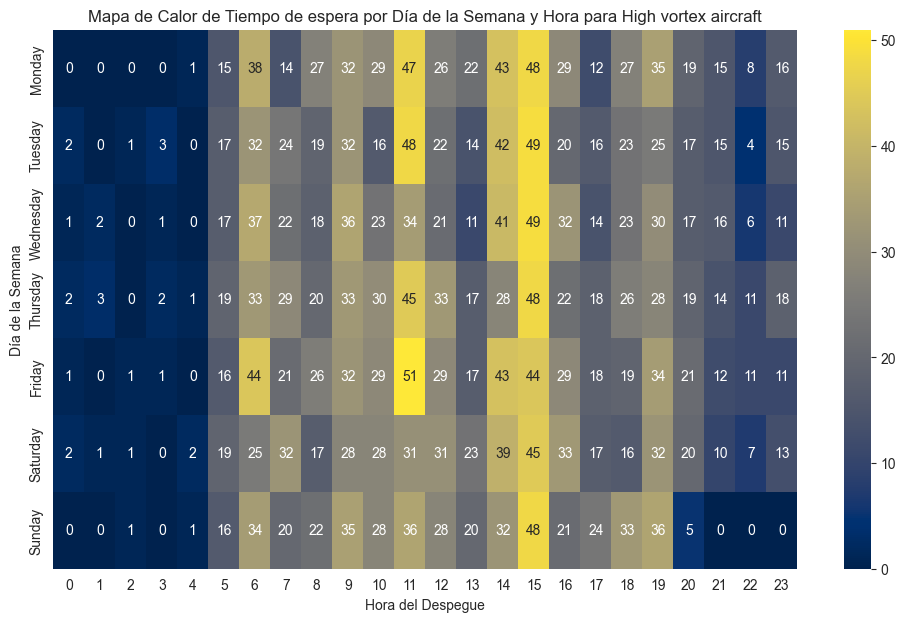

/var/folders/yj/b67nj6ns6354tz4fxwtg4stw0000gn/T/ipykernel_1750/2899263354.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['dia_semana'] = pd.Categorical(df_filtrado['fecha_despegue'].dt.day_name(), categories=day_order, ordered=True)
/var/folders/yj/b67nj6ns6354tz4fxwtg4stw0000gn/T/ipykernel_1750/2899263354.py:9: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df_filtrado.pivot_table(index='dia_semana', columns='hora_despegue', values='tiempo_espera', aggfunc='count', fill_value=0)


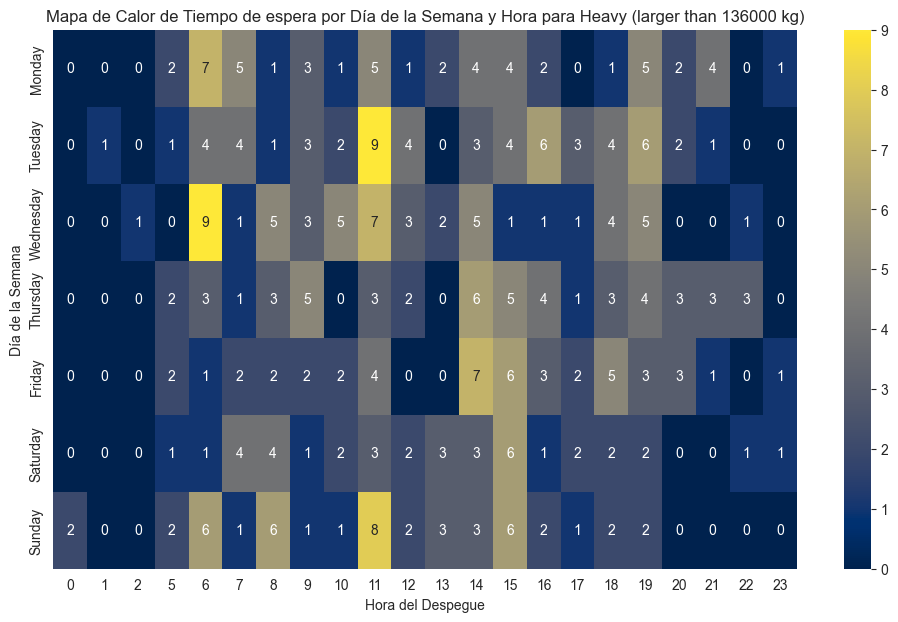

/var/folders/yj/b67nj6ns6354tz4fxwtg4stw0000gn/T/ipykernel_1750/2899263354.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['dia_semana'] = pd.Categorical(df_filtrado['fecha_despegue'].dt.day_name(), categories=day_order, ordered=True)
/var/folders/yj/b67nj6ns6354tz4fxwtg4stw0000gn/T/ipykernel_1750/2899263354.py:9: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df_filtrado.pivot_table(index='dia_semana', columns='hora_despegue', values='tiempo_espera', aggfunc='count', fill_value=0)


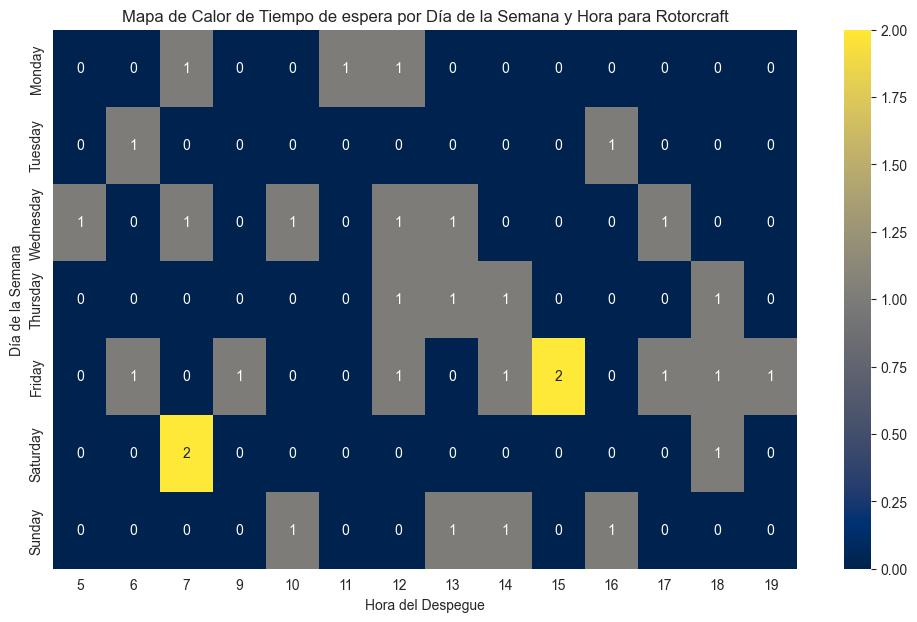

In [120]:
# Obtener los tipos de avión únicos
tipos_de_avion = df['aircraft_type'].unique()

for tipo in tipos_de_avion:
    df_filtrado = df[df['aircraft_type'] == tipo]
    df_filtrado['dia_semana'] = pd.Categorical(df_filtrado['fecha_despegue'].dt.day_name(), categories=day_order, ordered=True)

    # Crear la tabla pivotante
    pivot_table = df_filtrado.pivot_table(index='dia_semana', columns='hora_despegue', values='tiempo_espera', aggfunc='count', fill_value=0)

    # Generar el mapa de calor
    plt.figure(figsize=(12, 7))
    sns.heatmap(pivot_table, annot=True, fmt="d", cmap="cividis")
    plt.title(f'Mapa de Calor de Tiempo de espera por Día de la Semana y Hora para {tipo}')
    plt.xlabel('Hora del Despegue')
    plt.ylabel('Día de la Semana')
    plt.show()

Podemos ver que tanto 'High Vortex Aircraft' como 'Heavy' siguen más o menos la misma estructura, destacando el viernes a las 11 de la mañana como el momento en el que más retraso tienen los vuelos en ambos. Lo cual tiene sentido ya que es cuando la gente suele irse de viaje para aprovechar el viernes y el fin de semana. Por otro lado, las aeronaves 'Rotorcraft' no parecen seguir una estructura clara: esto puede ser debido a que ser vehiculos con usos mucho más limitados, son utilizados cuando son requeridos, lo cual no depende de ningún patrón

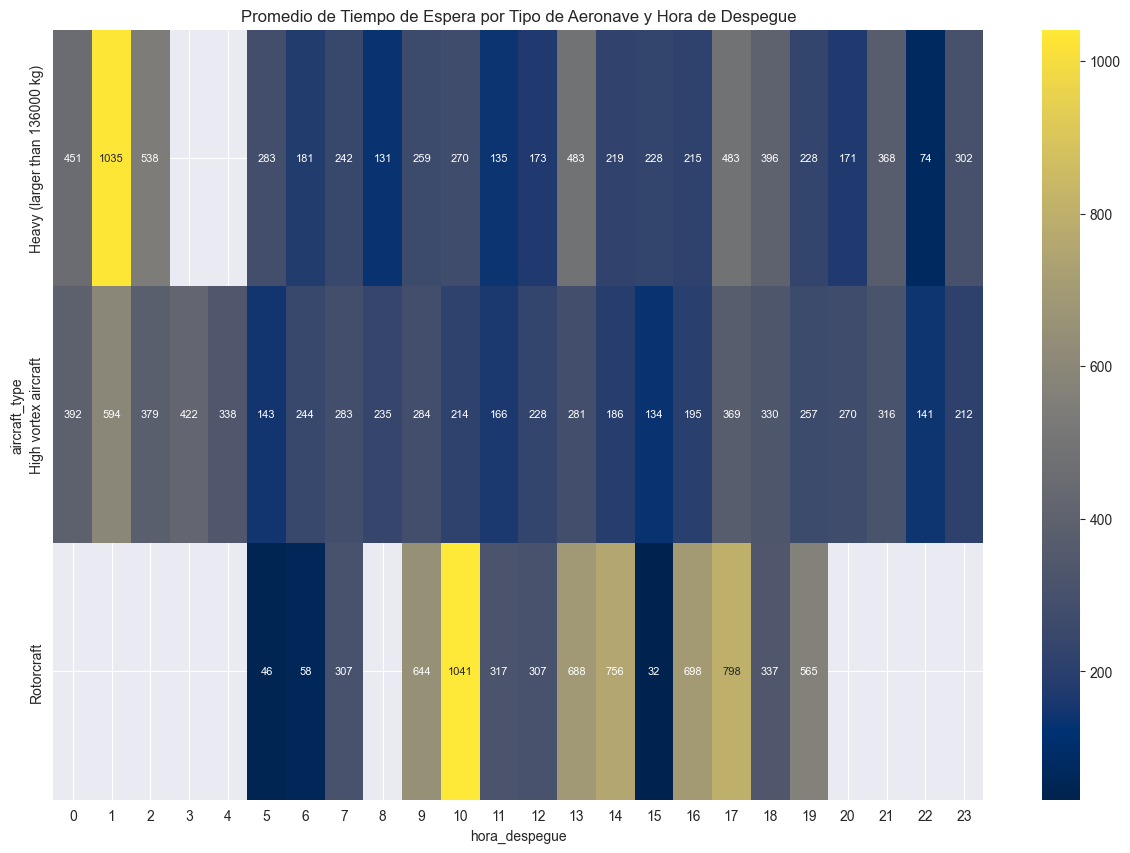

In [121]:
pivot_data = df.pivot_table(values='tiempo_espera', index='aircraft_type', columns='hora_despegue', aggfunc='mean')


plt.figure(figsize=(15, 10))  # Aumentar el tamaño de la figura
sns.heatmap(pivot_data, cmap="cividis", annot=True, fmt=".0f", annot_kws={"size": 8})  # Cambiar la paleta y ajustar tamaño de anotación
plt.title("Promedio de Tiempo de Espera por Tipo de Aeronave y Hora de Despegue")
plt.show()

Podemos ver que las horas en las que más esperan las aeronaves 'Rotorcraft' son las 3 de la mañana y las 3 de la tarde. Creemos que es simple coinicdencia, pero podría haber una justificación detrás de esto que no hemos encontrado. Las 'Heavy' no suelen tener que esperar mucho de media, siendo las5 de la mañana la hora en la que más esperan. Por último, las 'High Vortex'esperan m´s timepo entre las 2 y 4 de la mañana. Probablemente a estas horas sea cuando despegan los aviones de carga, ya que durante el día podrían interferir con los aviones de pasajeros. Estas aeronaves  de carga son menos prioritarias por lo general que las aeronaves de pasajeros, por lo que tienden a esperar más timepo.